### Самостоятельно подготовленная и размеченная тестовая выборка 

визуалиция тестовой выборки

In [1]:
import os 
import cv2
import numpy as np
import matplotlib.pyplot as plt


def visualize_all_classes(mask_path):
    """Показывает все классы разными цветами."""
    original_path = mask_path.replace('_mask.png', '.jpg')
    img = cv2.imread(original_path)
    msk = cv2.imread(mask_path, 0)
    
    if img is None:
        original_path = mask_path.replace('_mask.png', '.png')
        img = cv2.imread(original_path)
    
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    overlay = img_rgb.copy()
    
    # Цвета для разных классов
    colors = {
        1: [255, 0, 255]
    }
    
    # Накладываем каждый класс
    for class_id, color in colors.items():
        class_mask = (msk == class_id)
        overlay[class_mask] = (overlay[class_mask] * 0.3 + np.array(color) * 0.7).astype(np.uint8)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.imshow(img_rgb); ax1.set_title('Оригинал'); ax1.axis('off')
    ax2.imshow(overlay); ax2.set_title('Сегментационная маска'); ax2.axis('off')
    plt.show()

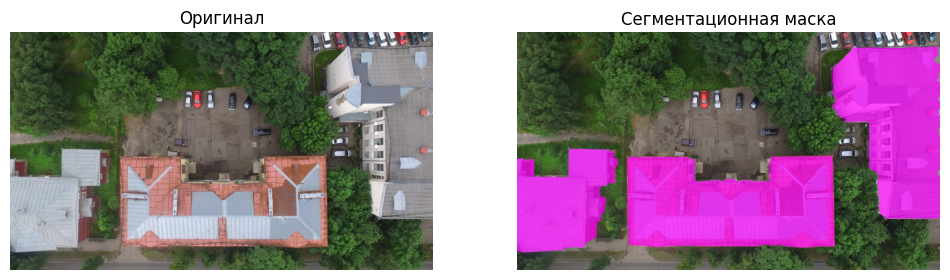

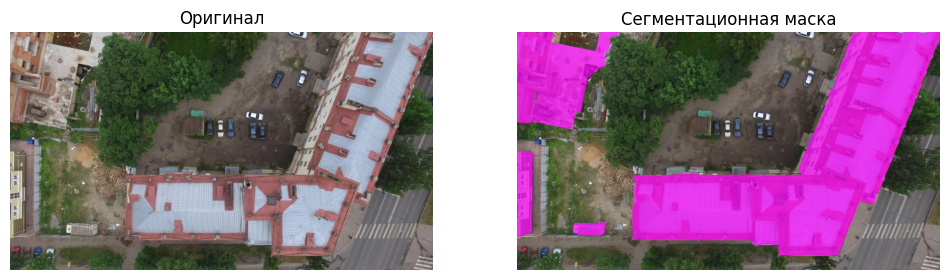

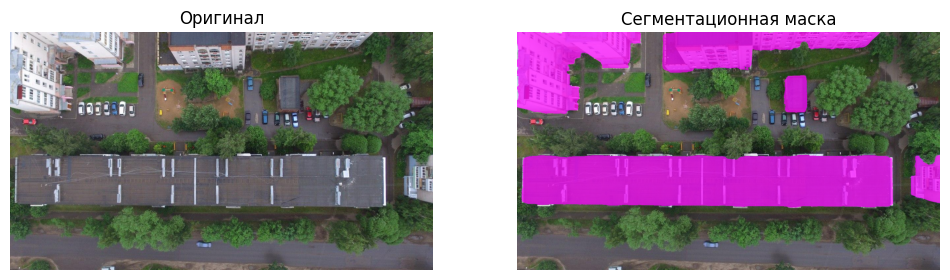

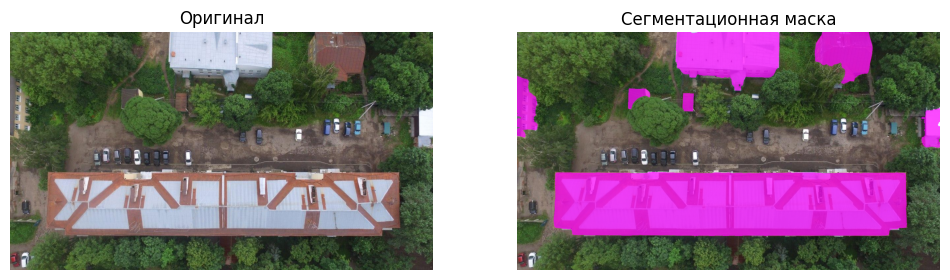

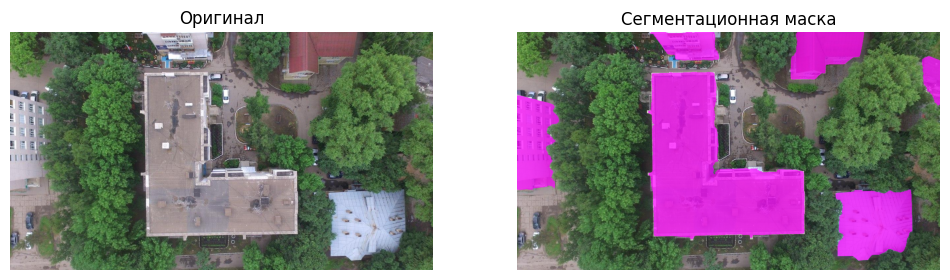

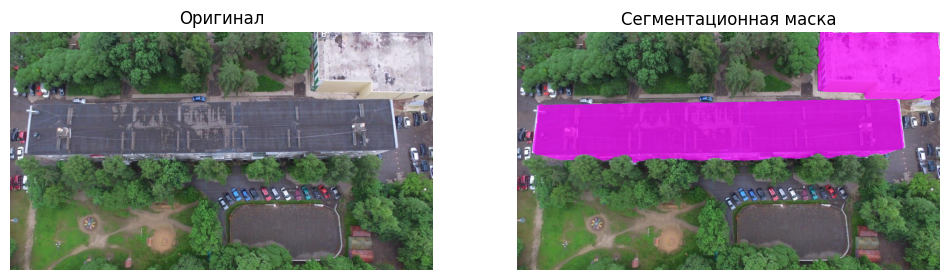

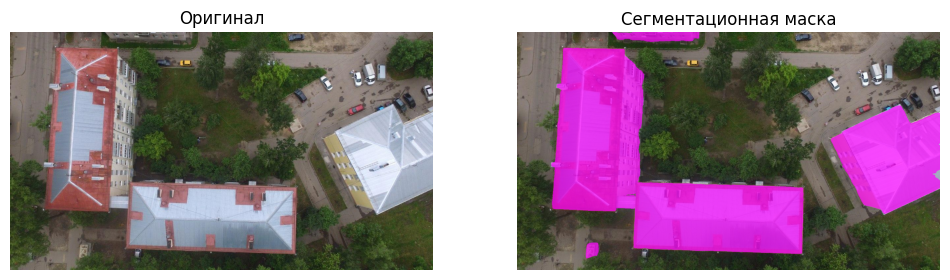

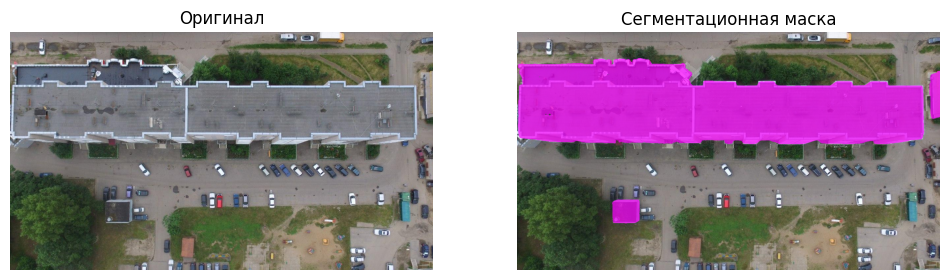

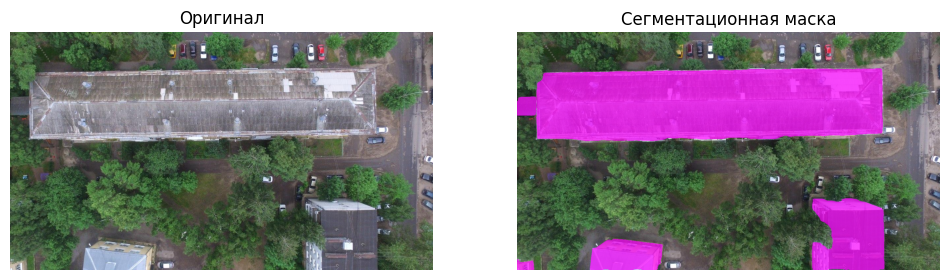

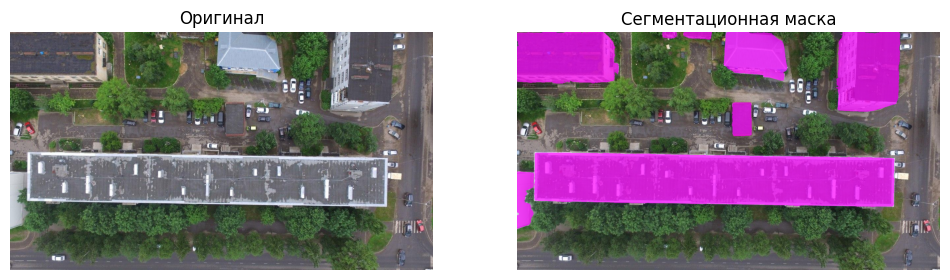

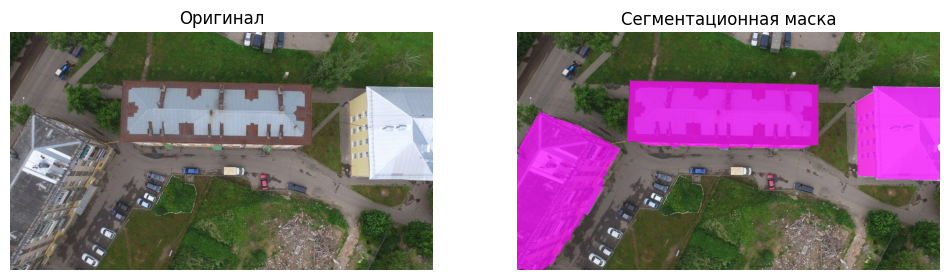

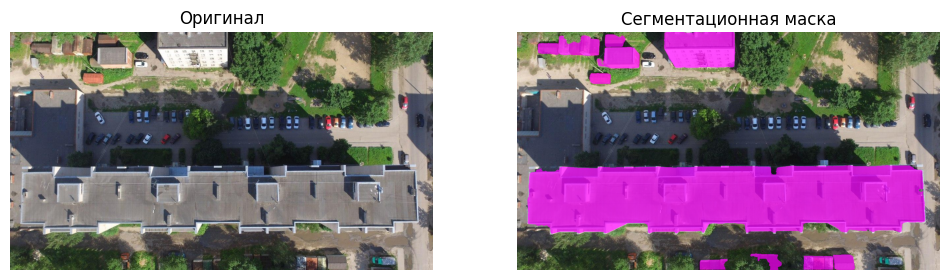

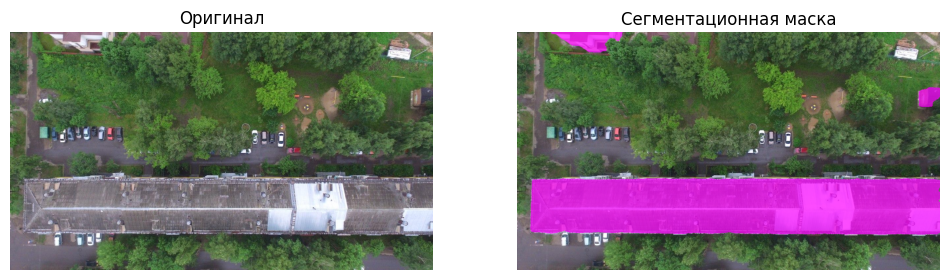

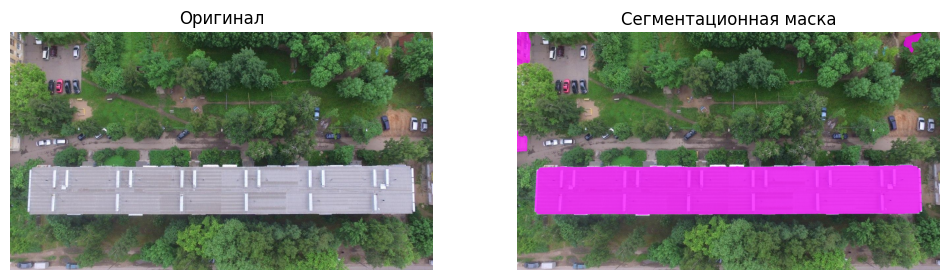

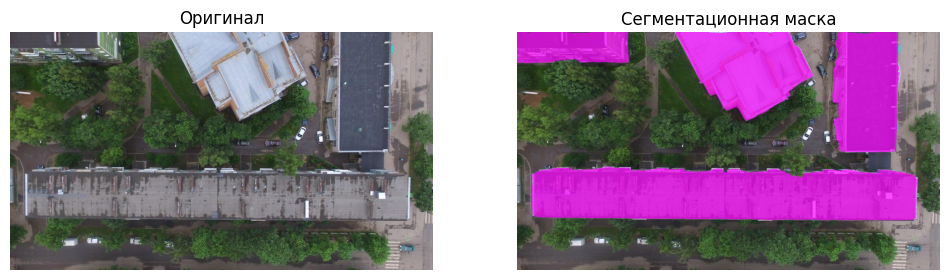

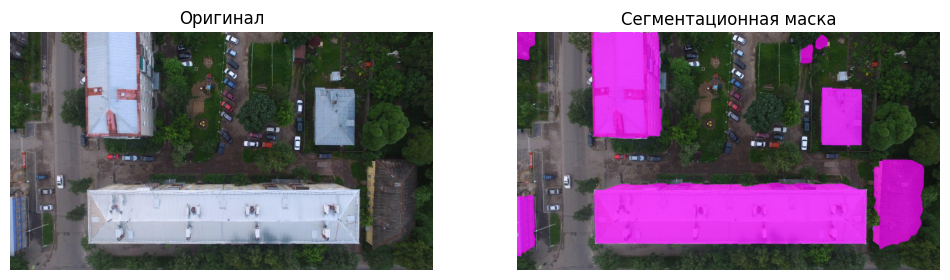

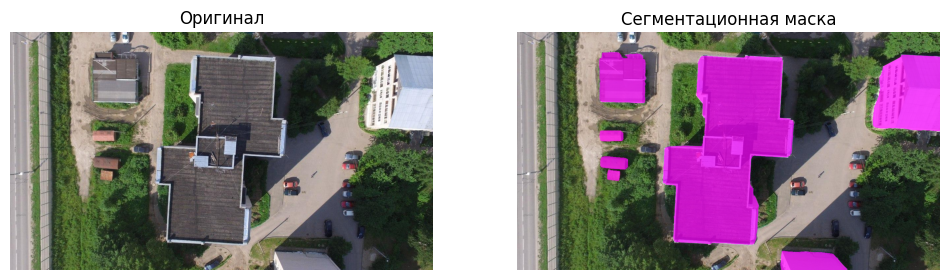

In [2]:
for photo in os.listdir('./Vologda/train')[2:]:
    if 'mask' not in photo:
        continue
    name = '.'.join(photo.split('.')[:3]).replace('_mask', '')
    visualize_all_classes(f"./Vologda/train/{name}_mask.png")

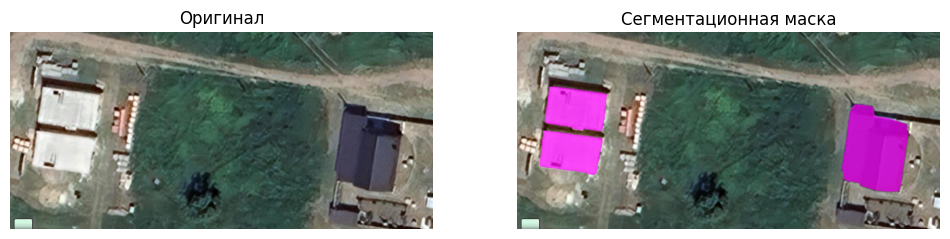

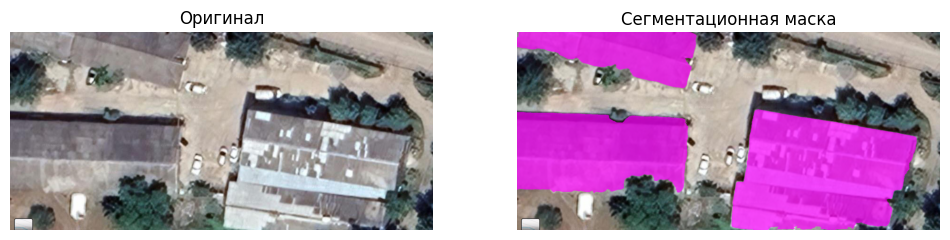

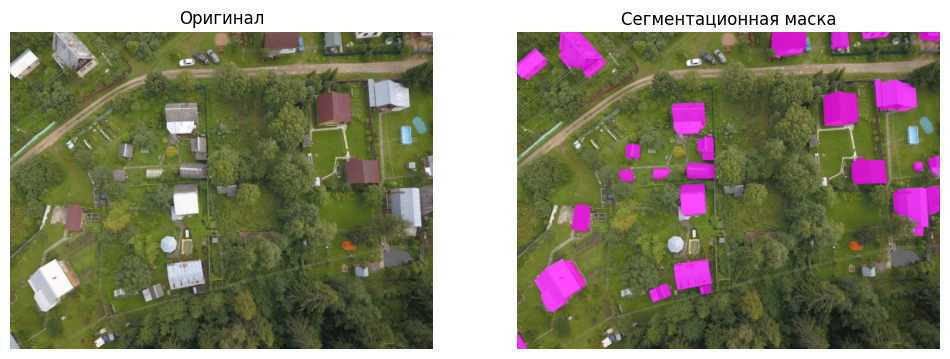

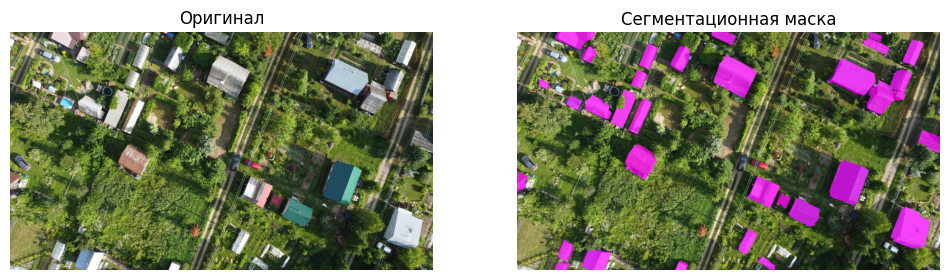

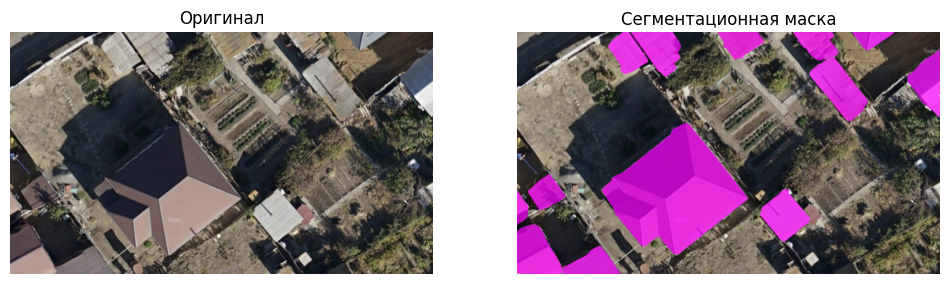

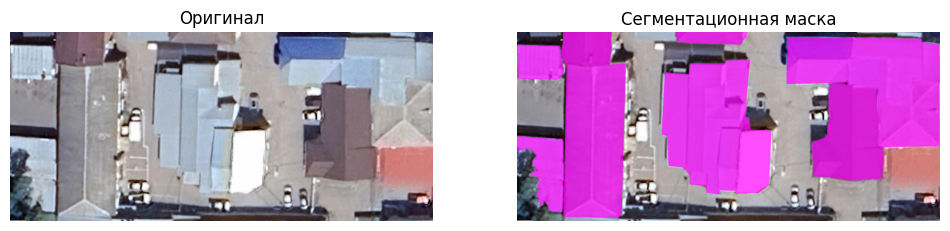

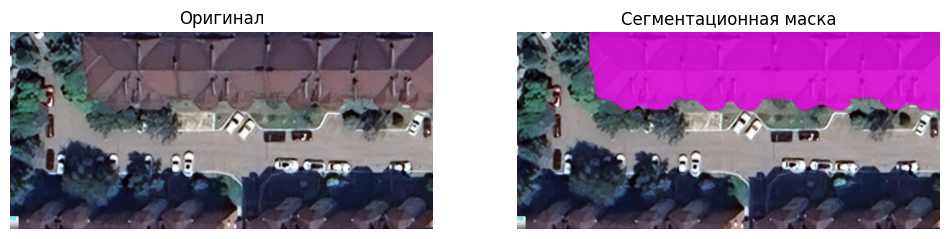

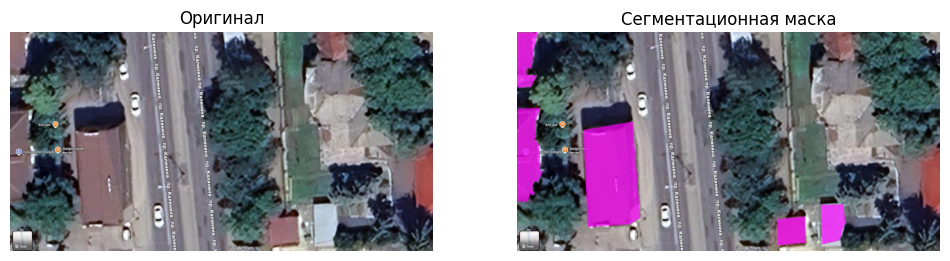

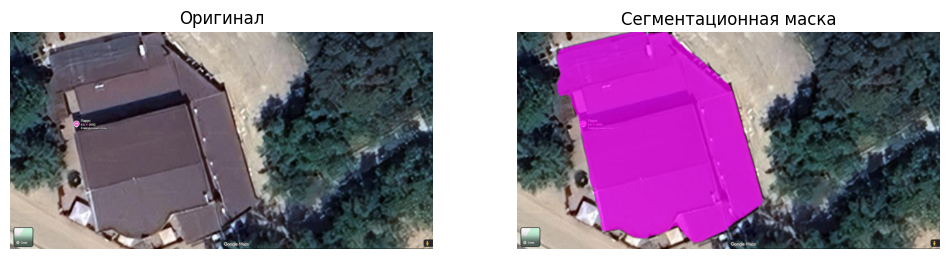

In [3]:
for photo in os.listdir('./Random_photos/train'):
    if 'mask' not in photo:
        continue
    name = '.'.join(photo.split('.')[:3]).replace('_mask', '')
    visualize_all_classes(f"./Random_photos/train/{name}_mask.png")